In [1]:
from pathlib import Path
import sys
sys.path.append('../')
from pma_open import *


# #My image
# file_path = '../Dropbox Files/hel1.pma'
# image_path = "../Channel Mapping/hel1_Avg_Frame/hel1_Avg_Frame.png"
# image = io.imread(image_path, as_gray=True)

# #Chanel image paths
# CH1_img_path = "../Channel Mapping/hel1_Avg_Frame/hel1_Avg_Frame_CH1.png"
# CH2_img_path = "../Channel Mapping/hel1_Avg_Frame/hel1_Avg_Frame_CH2.png"

# good_peaks_1,_ = good_peak_finder(CH1_img_path)
# good_peaks_2_new,_ = good_peak_finder(CH2_img_path, sigma=2, block_size=16, scaler_percent=10, boarder=10, max_rad=3)

# # Move good_peaks_1 to CH2 to display full image
# good_peaks_1_CH2 = shift_peaks(good_peaks_1)
# good_peaks_2_CH2 = shift_peaks(good_peaks_2_new)

# # Poly Mapping
# CH1_peaks_10= np.array([[14, 190], [308, 10], [493, 131], [115, 168], [273, 61], [55, 59], [179, 41], [234, 157], [365, 161], [502, 43]])
# CH2_peaks_10 = np.array([[18, 449], [311, 269], [492, 388], [119, 427], [276, 319], [60, 318], [183, 300], [236, 416], [364, 419], [501, 301]])

# params_x_man_10, params_y_man_10 = find_polyfit_params(CH1_peaks_10, CH2_peaks_10, degree=3)
# mapped_peaks_10 = apply_polyfit_params(good_peaks_1, params_x_man_10, params_y_man_10).astype(np.uint16)
# poly_pair_count_tol4_10, poly_pair_arr_CH1_tol4_10, poly_pair_arr_CH2_tol4_10 = find_polyfit_pairs(mapped_peaks_10, good_peaks_1, tolerance=4)


#My image
file_path = "../new files _24_3_25/hel1.pma"
image_path = "../Benchmarking/hel1_Avg/hel1_Avg_Frame.png"
image = io.imread(image_path, as_gray=True)

#Chanel image paths
CH1_img_path = "../Benchmarking/hel1_Avg/hel1_Avg_Frame_CH1.png"
CH2_img_path = "../Benchmarking/hel1_AVg/hel1_Avg_Frame_CH2.png"

good_peaks_1,_ = good_peak_finder(CH1_img_path)
good_peaks_2_new,_ = good_peak_finder(CH2_img_path)

# Move good_peaks_1 to CH2 to display full image
good_peaks_1_CH2 = shift_peaks(good_peaks_1)
good_peaks_2_CH2 = shift_peaks(good_peaks_2_new)

#new coords for CH2:
CH1_peaks_10 = np.array([[18,92], [16,213], [108,43], [106, 176], [210,51], [234, 219], [366,12], [322,192], [478, 106], [502,160]])
CH2_peaks_10_new = np.array([[22,349],[19,470],[111,300],[108,433],[212,307],[234,475],[367,268],[321,448],[476,361],[499,414]])
params_x_man_10_new, params_y_man_10_new = find_polyfit_params(CH1_peaks_10, CH2_peaks_10_new, degree=3)
mapped_peaks_10_new = apply_polyfit_params(good_peaks_1, params_x_man_10_new, params_y_man_10_new).astype(np.uint16)
poly_pair_count_tol4_10_new, poly_pair_arr_CH1_tol4_10_new, poly_pair_arr_CH2_tol4_10_new = find_polyfit_pairs(mapped_peaks_10_new, good_peaks_1, tolerance=3)

#unshift CH2 peaks [+1, +10] to original position
poly_pair_arr_CH2_tol4_10_new_unshift = shift_peaks(poly_pair_arr_CH2_tol4_10_new, [1, 10])

#remove peaks in CH2 that are out of bounds 
poly_pair_arr_CH2_tol4_10_curr = poly_pair_arr_CH2_tol4_10_new_unshift[(poly_pair_arr_CH2_tol4_10_new_unshift[:,1] <= 502) & (poly_pair_arr_CH2_tol4_10_new_unshift[:, 0] <= 502)]
poly_pair_arr_CH1_tol4_10_curr = poly_pair_arr_CH1_tol4_10_new[(poly_pair_arr_CH2_tol4_10_new_unshift[:,1] <= 502) & (poly_pair_arr_CH2_tol4_10_new_unshift[:, 0] <= 502)]


In [2]:
# define key variables
y_centres_hel1 = np.concatenate((poly_pair_arr_CH1_tol4_10_curr[:,0],poly_pair_arr_CH2_tol4_10_curr[:,0]))
x_centres_hel1 = np.concatenate((poly_pair_arr_CH1_tol4_10_curr[:,1],poly_pair_arr_CH2_tol4_10_curr[:,1]))
circle_array = draw_circle(4, y_centres_hel1, x_centres_hel1, image.shape[0])
mask_new = (circle_array == [255, 255, 0]).all(axis=-1)
if image.ndim == 2:
    image_3d = np.repeat(image[..., np.newaxis], 3, -1)
elif image.ndim==3 and image.shape[2]==3:
    image_3d = image
image_3d[mask_new] = [255, 255, 0]

In [36]:
# This code is really inefficient!! Come back to this !!

# def static_local_subtraction(pma_file_path, input_array, radius, y_centre_arr, x_centre_arr):
#     frames_data = read_pma(pma_file_path) 
#     all_peaks_intensity = 0
#     num_of_peak_pixels = count_circle(radius)
#     intensity_to_remove_arr = []

#     for y_centre, x_centre in zip(y_centre_arr, x_centre_arr):
#         y1, y2 = max(0, y_centre - radius-1), min(input_array.shape[0], y_centre + radius+2)
#         x1, x2 = max(0, x_centre - radius-1), min(input_array.shape[1], x_centre + radius+2)

#         for i in range(x_centre - radius, x_centre+ radius + 1):
#             for j in range(y_centre - radius, y_centre + radius + 1):
#                 if (i - x_centre) ** 2 + (j - y_centre) ** 2 < radius ** 2:
#                     all_peaks_intensity = int(input_array[j][i][0])
#         total_zone_intensity = np.sum(input_array[y1:y2, x1:x2, 2])
#         num_zone_pixels = (y2-y1)*(x2-x1)
#         intensity_to_remove = (total_zone_intensity-all_peaks_intensity) // (num_zone_pixels-num_of_peak_pixels)
#         intensity_to_remove_arr.append(intensity_to_remove)

#     corrected_frames_data = []
#     for frame_idx in range(len(frames_data)):
#         frame = frames_data[frame_idx].astype(np.uint8)
#         for y_centre, x_centre, intensity_to_remove in zip(y_centre_arr, x_centre_arr, intensity_to_remove_arr):
#             y1, y2 = max(0, y_centre - radius-1), min(input_array.shape[0], y_centre + radius+2)
#             x1, x2 = max(0, x_centre - radius-1), min(input_array.shape[1], x_centre + radius+2)
#             frame[y1:y2, x1:x2] = np.clip(frame[y1:y2, x1:x2] - intensity_to_remove, 0, 255).astype(np.uint8)
#         corrected_frames_data.append(frame)

#     return corrected_frames_data



In [37]:
Frames_data = read_pma(file_path)
print(f"Frames_data type: {type(Frames_data)}")
print(f"Frames_data[0] Shape: {Frames_data[0].shape}")
print(f"Frames_data element type: {type(Frames_data[0][0][0])}\n")

corrected_frames_data = static_local_subtraction(file_path, image_3d, 4, y_centres_hel1, x_centres_hel1)
print(f"Corrected Frames_data type: {type(corrected_frames_data)}")
print(f"Corrected Frames_data[0] shape: {corrected_frames_data[0].shape}")
print(f"Corrected Frames_data element type: {type(corrected_frames_data[0][0][0])}")

Image Size: 512 x 512
Frames_data type: <class 'list'>
Frames_data[0] Shape: (512, 512)
Frames_data element type: <class 'numpy.uint8'>

Image Size: 512 x 512
Corrected Frames_data type: <class 'list'>
Corrected Frames_data[0] shape: (512, 512)
Corrected Frames_data element type: <class 'numpy.uint8'>


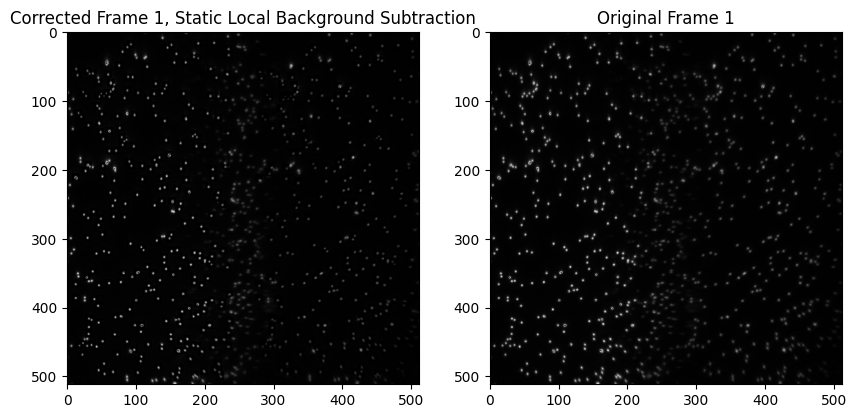

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(corrected_frames_data[0], cmap='gray')
ax[0].set_title('Corrected Frame 1, Static Local Background Subtraction')

ax[1].imshow(Frames_data[0], cmap='gray')
ax[1].set_title('Original Frame 1')
plt.show()

In [39]:
print(poly_pair_arr_CH1_tol4_10_curr[121])
print(poly_pair_arr_CH2_tol4_10_curr[121])

[454  35]
[453 301]


In [40]:
print(Frames_data[0][453][30:40])
print(Frames_data[0][454][30:40])
print(Frames_data[0][455][30:40])

[14  9 10 18 39 53 35 13  7  7]
[ 24  13  13  30  95 148  93  25   9   7]
[ 60  19  16  38 129 204 129  33  11   9]


In [41]:
# hone in on 454, 35 of frame 0
print(corrected_frames_data[0][453][30:40])
print(corrected_frames_data[0][454][30:40])
print(corrected_frames_data[0][455][30:40])

[ 0  0  0  0  4 39 21  0  0  0]
[  0   0   0   0  60 134  79   0   0   0]
[ 25   0   0   3  94 190 115   0   0   0]


In [42]:
Frames_data = read_pma(file_path)
print(f"Frames_data type: {type(Frames_data[0])}")
print(f"Frames_data type: {type(Frames_data[0][0])}")
print(f"Frames_data type: {type(Frames_data[0][0][0])}")
print(f"\ncorrected_frames_data type: {type(corrected_frames_data[0])}")
print(f"corrected frames_data type: {type(corrected_frames_data[0][0])}")
print(f"corrected_frames_data type: {type(corrected_frames_data[0][0][0])}")

Image Size: 512 x 512
Frames_data type: <class 'numpy.ndarray'>
Frames_data type: <class 'numpy.ndarray'>
Frames_data type: <class 'numpy.uint8'>

corrected_frames_data type: <class 'numpy.ndarray'>
corrected frames_data type: <class 'numpy.ndarray'>
corrected_frames_data type: <class 'numpy.uint8'>


Number of pixels in zone: 121
Number of peak pixels: 45
Total zone intensity: 1364
Total peak intensity: 255
Intensity to remove: 14


Text(0.5, 1.0, 'Corrected Frame 1 Peak 0')

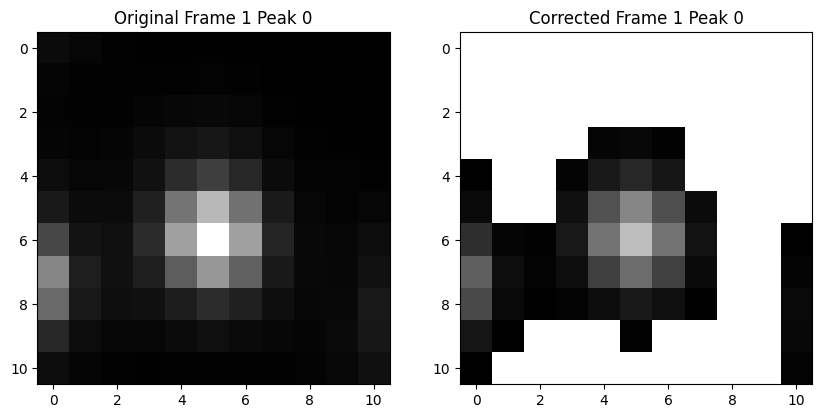

In [43]:
y_centre = 454
x_centre = 35
radius = 4
input_array = image_3d
num_of_peak_pixels = count_circle(radius)

y1, y2 = max(0, y_centre - radius-1), min(input_array.shape[0], y_centre + radius+2)
x1, x2 = max(0, x_centre - radius-1), min(input_array.shape[1], x_centre + radius+2)

for i in range(x_centre - radius, x_centre+ radius + 1):
    for j in range(y_centre - radius, y_centre + radius + 1):
        if (i - x_centre) ** 2 + (j - y_centre) ** 2 < radius ** 2:
            all_peaks_intensity = int(input_array[j][i][0])
total_zone_intensity = np.sum(input_array[y1:y2, x1:x2, 2])
num_zone_pixels = (y2-y1)*(x2-x1)
intensity_to_remove = (total_zone_intensity-all_peaks_intensity) // (num_zone_pixels-num_of_peak_pixels)



frame = Frames_data[0].astype(np.uint8)
corrected_frame0_data = frame.copy()
y1, y2 = max(0, y_centre - radius-1), min(input_array.shape[0], y_centre + radius+2)
x1, x2 = max(0, x_centre - radius-1), min(input_array.shape[1], x_centre + radius+2)
corrected_frame0_data[y1:y2, x1:x2] = np.clip(frame[y1:y2, x1:x2] - intensity_to_remove, 0, 255).astype(np.uint8)

print(f"Number of pixels in zone: {num_zone_pixels}")
print(f"Number of peak pixels: {num_of_peak_pixels}")
print(f"Total zone intensity: {total_zone_intensity}")
print(f"Total peak intensity: {all_peaks_intensity}")
print(f"Intensity to remove: {intensity_to_remove}")
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(frame[y1:y2, x1:x2], cmap='gray')
ax[0].set_title('Original Frame 1 Peak 0')
ax[1].imshow(corrected_frame0_data[y1:y2, x1:x2], cmap='gray')
ax[1].set_title('Corrected Frame 1 Peak 0')